<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/RedesNeurais/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


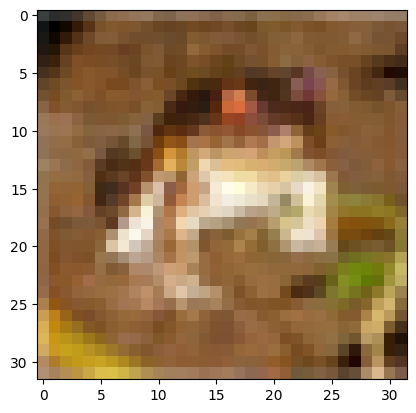

In [3]:
plt.imshow(X_train[0])

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

O fator de ruído é 0.1 porque com 0.3 ficou quase impossível de entender a imagem

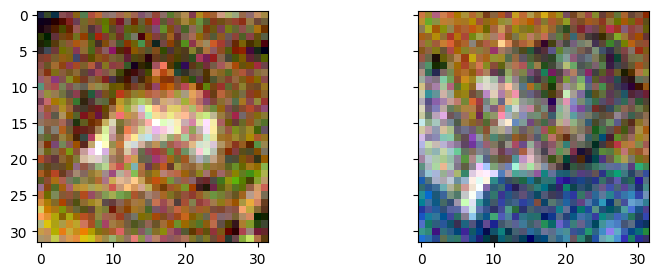

In [7]:
noise_factor = 0.1

X_train_noise = []
X_test_noise = []

for img_train, img_test in zip(X_train, X_test):
    noisy_image_train = img_train + noise_factor * np.random.randn(*img_train.shape)
    noisy_image_train = np.clip(noisy_image_train, 0., 1.)
    X_train_noise.append(noisy_image_train)

    noisy_image_test = img_test + noise_factor * np.random.randn(*img_test.shape)
    noisy_image_test = np.clip(noisy_image_test, 0., 1.)
    X_test_noise.append(noisy_image_test)

fig, ax = plt.subplots(1, 2, figsize=(9,3), sharey=True)

ax[0].imshow(X_train_noise[0])
ax[1].imshow(X_test_noise[0])

fig.show()

In [8]:
X_train_noise = np.reshape(X_train_noise, (-1, 32, 32, 3))
X_test_noise = np.reshape(X_test_noise, (-1, 32, 32, 3))

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
X_input = tf.keras.layers.Input((32, 32, 3))

X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
X = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)

X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(X)
X = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 32, 32, 3)        435       
 ranspose)                                                       
                                                                 
Total params: 3,211
Trainable params: 3,211
Non-trainable p

In [19]:
history = model.fit(X_train_noise, X_train, batch_size=100, validation_split=0.1, epochs=50)

Epoch 1/50
90/90 [==============================] - 1s 9ms/step - loss: 0.5563 - val_loss: 0.5620
Epoch 2/50
90/90 [==============================] - 1s 6ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 3/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5562 - val_loss: 0.5621
Epoch 4/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 5/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5562 - val_loss: 0.5621
Epoch 6/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 7/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 8/50
90/90 [==============================] - 1s 6ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 9/50
90/90 [==============================] - 1s 7ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 10/50
90/90 [==============================] - 1s 7ms/step - loss: 0.5562 - val_loss: 0.5620
Epoch 11/50
90/90 [

In [20]:
predict = model.predict(X_test_noise)

313/313 [==============================] - 1s 2ms/step


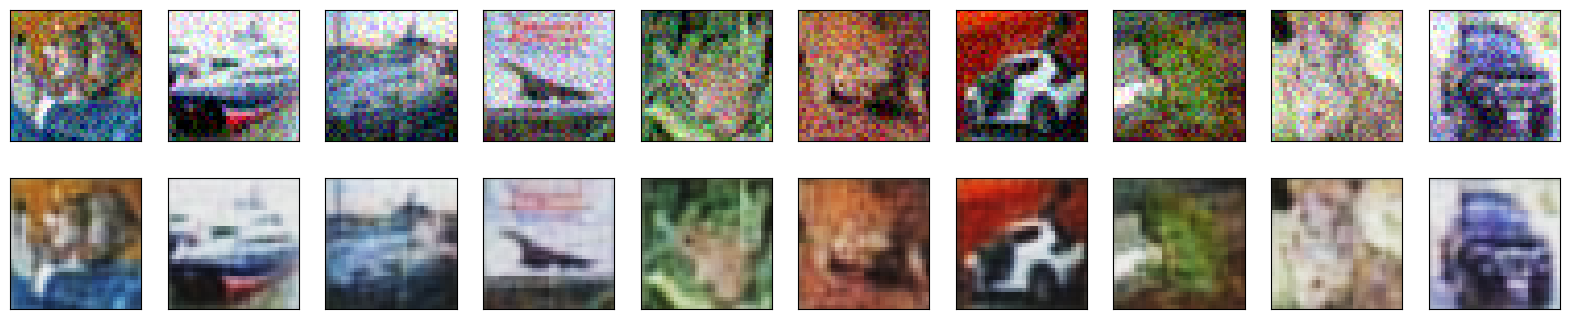

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test_noise[:10], predict], axes):
    for img, ax in zip(images, row):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
     

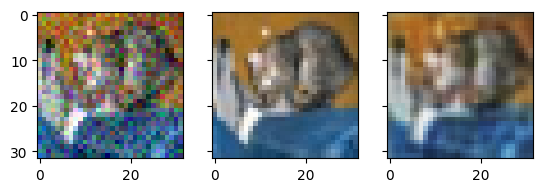

In [34]:
fig, ax = plt.subplots(1, 3, sharey=True)

ax[0].imshow(X_test_noise[0])
ax[1].imshow(X_test[0])
ax[2].imshow(predict[0])

fig.show()